## Snake Problem
A snake is a one-dimensional object of length 30cm. It moves at a speed of 1 cm/second. It lives in a cage of 1000cm x 1000cm. The snake can only move horizontally or vertically. At random intervals (1 every 5 seconds in average) the snake can turn left or right. If the snake intersect itself, the snake bites itself and dies. The snake starts moving at the center of the cage.

The question is whether it is good to bet $1000 on that the snake will bite itself before it reaches the end of the cage.


In [1]:
class node():
    def __init__(self, val):
        self.val = val
        self.L = None
        self.R = None

In [2]:
left = node(lambda x,y: (x-1, y))
up = node(lambda x,y: (x, y+1))
right = node(lambda x,y: (x+1, y))
down = node(lambda x,y: (x, y-1))
left.L, up.L, right.L, down.L = down, left, up, right
left.R, up.R, right.R, down.R = up, right, down, left

In [3]:
class snake():
    def __init__(self):
        self.body = [(i,0) for i in range(30)]
        self.direction = left
        self.dead = False
        self.completed = False
    def move(self):
        del self.body[-1]
        newhead = self.direction.val(*self.body[0])
        if newhead in self.body:
            self.dead = True
        elif self.__reach_edge(newhead):
            sefl.complete = True
        self.body.insert(0, newhead)
    def __reach_edge(self, point):
        return any(axis<=-500 or axis>=500 for axis in point)
    def change_dir(self, clockwise=False): ### default: turn left
        if clockwise:
            self.direction = self.direction.R
        else:
            self.direction = self.direction.L
    def visualize(self):
        return None
    def __str__(self):
        return ''

In [4]:
import pandas as pd
import numpy as np
from math import ceil
from random import *
import os

In [5]:
cwd = os.getcwd()

In [6]:
def simulate_once(record=False):
    my_snake = snake()
    if record:
        footage = pd.DataFrame(my_snake.body)
        file = os.path.join(cwd, 'snake_footage.csv')
    while True:
        ###Turn every 5 seconds in average
        seconds = ceil(expovariate(0.2))
        
        ##before every turn, move forward in current direction
        for i in range(seconds):
            my_snake.move()
            if record:
                footage = pd.concat([footage, pd.DataFrame(my_snake.body)], axis=1)
            if my_snake.dead:
                if record:
                    footage.to_csv(file, header=None, index=False)
                return 0
            elif my_snake.completed:
                if record:
                    footage.to_csv(file, header=None, index=False)
                return 1
            
        ### change direction
        turn = choice(['left', 'right'])
        if turn == 'left':
            my_snake.change_dir(clockwise=False)
        else:
            my_snake.change_dir(clockwise=True)

#### Visualiztion the snake

In [7]:
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [8]:
simulate_once(record=True)

0

In [10]:
file = os.path.join(cwd, 'snake_footage.csv')
dot_data = pd.read_csv(file, header=None)

<IPython.core.display.Javascript object>


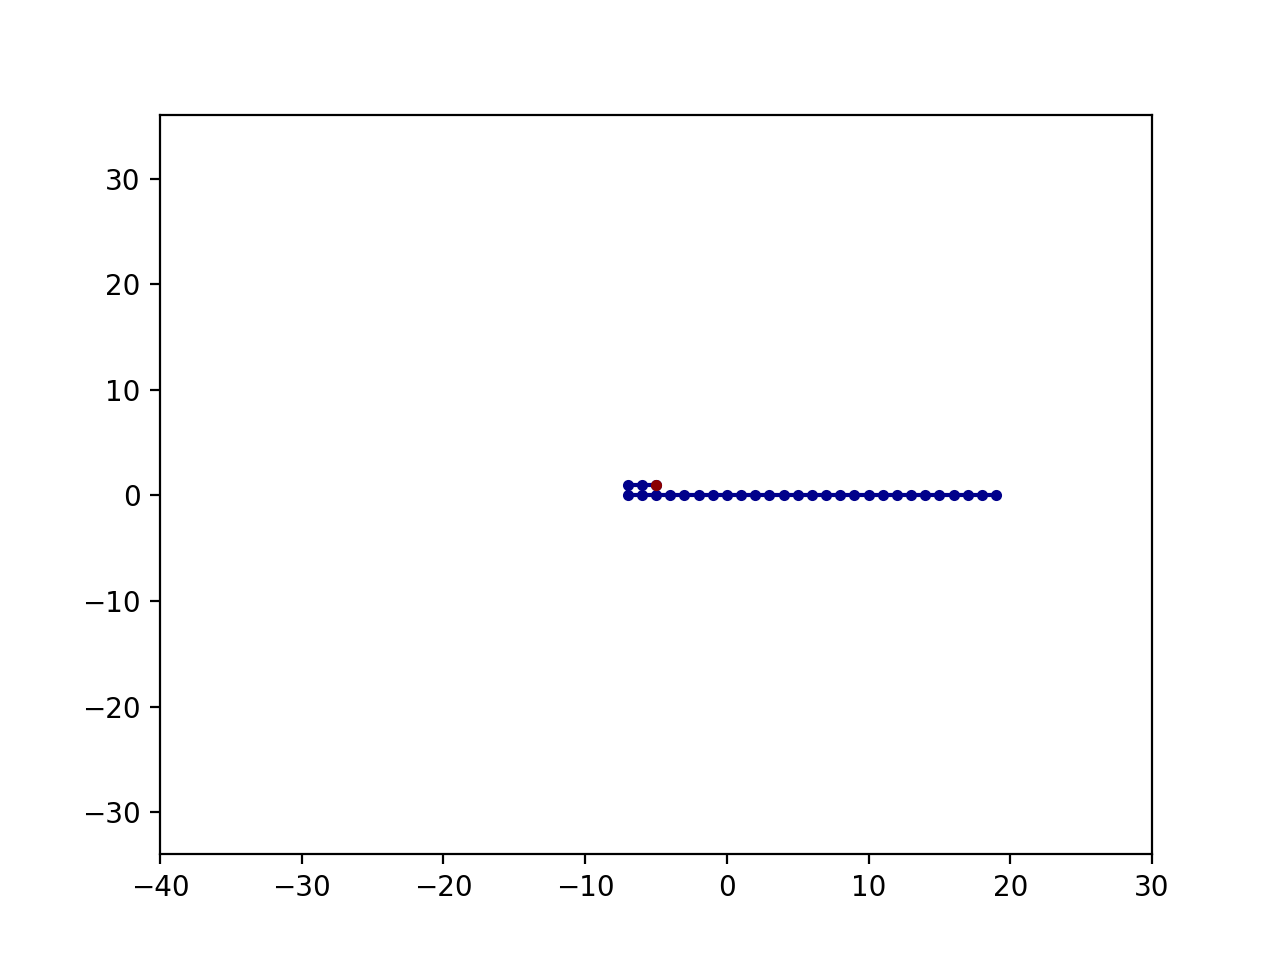

In [11]:
fig, ax = plt.subplots()
curr_x, curr_y = 0, 1
steps = dot_data.shape[1]
def animate(i):
    global curr_x, curr_y
    try:
        x = np.array(dot_data[curr_x])
        y = np.array(dot_data[curr_y])
    except:
        curr_x, curr_y = 0, 1
    else:
        head = [x[0],y[0]]
        ax.clear()
        plt.plot(x,y, c='DarkBlue', marker='.')
        plt.plot(head[0],head[1], c='DarkRed', marker='.')
        plt.xlim(head[0]-35, head[0]+35)
        plt.ylim(head[1]-35, head[1]+35)
        curr_x += 2
        curr_y += 2

ani = animation.FuncAnimation(fig,animate,
                              interval=500, blit=False)
plt.show()

#### Save animation as gif file

In [11]:
# !brew install imagemagick
# ani.save(os.path.join(cwd,'animation.gif'), writer='imagemagick', fps=60)

In [12]:
def simulate_many(times):
    total = positive = 0
    for i in range(times):
        positive += simulate_once()
    return positive/times

In [13]:
simulate_many(100000)

0.0